<a href="https://colab.research.google.com/github/isha-nagpal13/Python_Scripts/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Cell 1: imports + nicer display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# show more rows/cols if needed
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)


In [5]:
# Cell 2: load dataset and show first 20 rows
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("\nFirst 20 rows:\n")
display(df.head(20))



Dataset shape: (768, 9)

First 20 rows:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome distribution (class counts):


,count
Outcome,
0,500
1,268


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


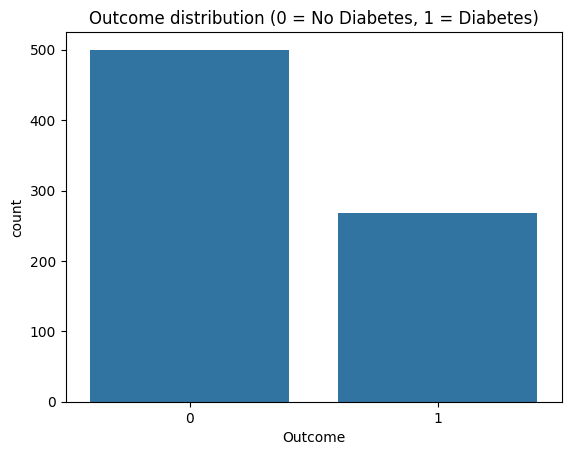

In [6]:
# Cell 3: quick EDA
print("Columns:", list(df.columns))
print("\nInfo:")
display(df.info())

print("\nMissing values per column:\n", df.isnull().sum())
print("\nOutcome distribution (class counts):")
display(df['Outcome'].value_counts())

# quick statistics
display(df.describe())
sns.countplot(x='Outcome', data=df)
plt.title("Outcome distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()


In [7]:
# Cell 4: replace zeros in medically invalid columns with median
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    median_valid = df[df[col] != 0][col].median()
    print(f"{col}: zeros = {zero_count}, median (non-zero) = {median_valid}")
    df.loc[df[col] == 0, col] = median_valid

# Verify
display(df[cols_with_zeros].describe())


Glucose: zeros = 5, median (non-zero) = 117.0
BloodPressure: zeros = 35, median (non-zero) = 72.0
SkinThickness: zeros = 227, median (non-zero) = 29.0
Insulin: zeros = 374, median (non-zero) = 125.0
BMI: zeros = 11, median (non-zero) = 32.3


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208
std,30.438286,12.096642,8.791221,86.383060,6.875177
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [8]:
# Cell 5: show first 20 rows after cleaning
print("First 20 rows after cleaning:\n")
display(df.head(20))


First 20 rows after cleaning:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,29,125,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,29,125,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,29,125,32.3,0.232,54,1


In [11]:
# Cell 6: split, scale, stratified train/test split
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# stratify to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class counts:\n", pd.Series(y_train).value_counts())
print("Test class counts:\n", pd.Series(y_test).value_counts())


Train shape: (537, 8) Test shape: (231, 8)
Train class counts:
 Outcome
0    350
1    187
Name: count, dtype: int64
Test class counts:
 Outcome
0    150
1     81
Name: count, dtype: int64


In [10]:
# Cell 7: define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# quick print
print("Models to run:", list(models.keys()))


Models to run: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']


In [12]:
# Cell 8: train models and collect metrics
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]   # probability for class 1

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, roc])

results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1 Score','ROC-AUC'])
results_df = results_df.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True)
display(results_df)


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.744589,0.671875,0.530864,0.593103,0.836132
1,Random Forest,0.740260,0.666667,0.518519,0.583333,0.818889
2,SVM,0.744589,0.677419,0.518519,0.587413,0.817119
3,Decision Tree,0.688312,0.558442,0.530864,0.544304,0.652099


In [13]:
# Cell 9: pretty print table
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))


| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |
|---------------------|------------|-------------|----------|------------|-----------|
| Logistic Regression |   0.744589 |    0.671875 | 0.530864 |   0.593103 |  0.836132 |
| Random Forest       |   0.74026  |    0.666667 | 0.518519 |   0.583333 |  0.818889 |
| SVM                 |   0.744589 |    0.677419 | 0.518519 |   0.587413 |  0.817119 |
| Decision Tree       |   0.688312 |    0.558442 | 0.530864 |   0.544304 |  0.652099 |



Confusion Matrix - Logistic Regression


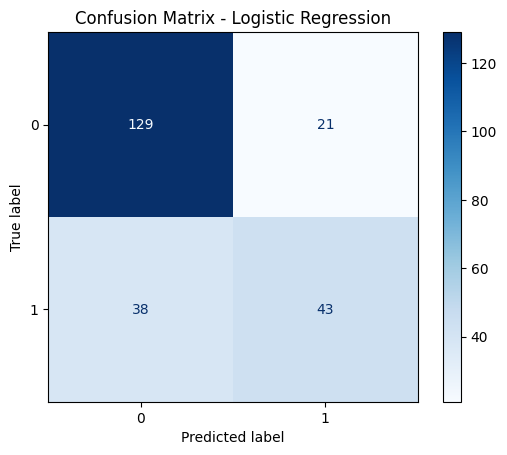


Confusion Matrix - Decision Tree


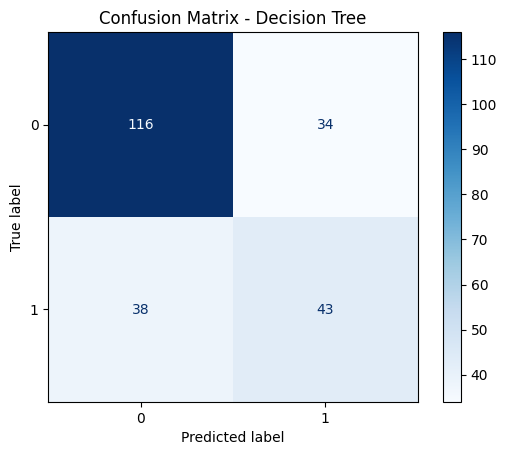


Confusion Matrix - Random Forest


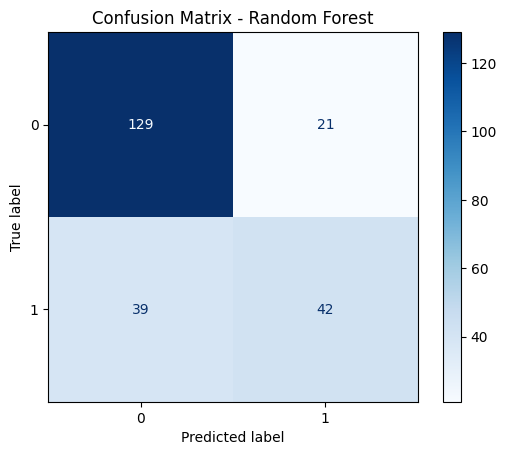


Confusion Matrix - SVM


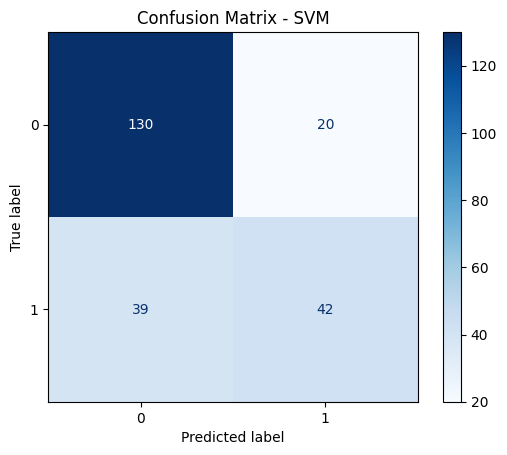

In [14]:
# Cell 10: confusion matrices
for name, model in models.items():
    print("\nConfusion Matrix -", name)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()


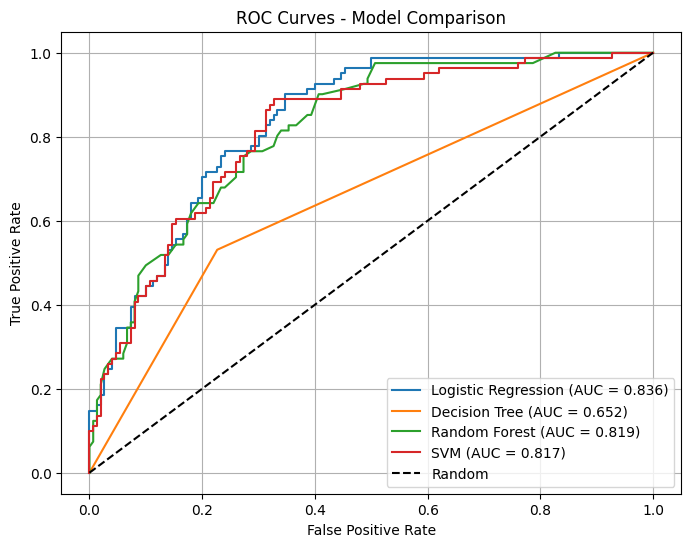

In [15]:
# Cell 11: ROC curves
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Cell 12: save results and optionally save notebook artifacts
results_df.to_csv("diabetes_model_comparison.csv", index=False)
print("Saved results to diabetes_model_comparison.csv")

# Optionally save trained Random Forest model (if you want to load later)
import joblib
joblib.dump(models['Random Forest'], "random_forest_diabetes.pkl")
print("Saved Random Forest model to random_forest_diabetes.pkl")


Saved results to diabetes_model_comparison.csv
Saved Random Forest model to random_forest_diabetes.pkl
